# K-Means with limited number of features and only 50 top genres

In [10]:
import pandas as pd

top_genres = pd.read_csv('top_school_genres.csv', header = None)

top_genres.head()

,0,1
0,pop,0.036101
1,poprap,0.034287
2,hiphop,0.030061
3,rap,0.025582
4,electropop,0.024342


In [11]:
top_genres.tail()

,0,1
45,indiegaragerock,0.005963
46,urbancontemporary,0.005874
47,escaperoom,0.005714
48,deepccm,0.005368
49,westcoasttrap,0.005314


In [12]:
play_features = pd.read_csv('play_id_to_features.csv')
genre_names = pd.read_csv('all_genres.csv')

genre_names['PLAY_ID'] = genre_names['SPOTIFY_URL'].map(lambda s: s.split('playlist')[1][1:])

In [13]:
sub = genre_names[['GENRE','PLAY_ID']]

In [14]:
sub = sub.set_index('PLAY_ID')

In [15]:
play_features = play_features.set_index('Unnamed: 0')

In [16]:
play_features['genre'] = sub
play_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
Unnamed: 0,,,,,,,,,,,,,
2JsqQdMbBC2hh7GjsEjKFg,0.222149,0.073075,4.38,-25.78303,0.66,0.041801,0.922340,0.899800,0.118957,0.095634,92.38971,3.60,backgroundmusic
2SoQc6bippmMyUTn1qditv,0.525410,0.645390,4.22,-9.24089,0.72,0.083043,0.468130,0.066672,0.282273,0.695130,119.71814,3.55,classicmoroccanpop
1KZMCWImik3vA17zVLJ3c3,0.213119,0.166708,5.39,-18.83644,0.56,0.039690,0.966740,0.210298,0.152561,0.144698,102.87562,3.69,orthodoxchant
1i9zTcQqWUBTgIuCgxDW3S,0.439940,0.348418,5.05,-12.84006,0.71,0.055323,0.896280,0.855150,0.141858,0.396229,107.26951,3.60,tar
0TcXdt4sbITbwCwwFbKYyd,0.789310,0.518160,5.14,-10.01960,0.53,0.133222,0.148952,0.111601,0.148528,0.736290,118.49993,4.00,reggae


In [17]:
play_features.to_csv('top_playlists_with_features.csv')

In [19]:
play_features = play_features.set_index('genre')

In [23]:
play_features = play_features.loc[top_genres[0].values]

In [25]:
from sklearn.cluster import KMeans

X = play_features[['danceability', 'key', 'loudness']].to_numpy()

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [26]:
sample = play_features.copy()
sample['cluster'] = kmeans.labels_

In [27]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
%matplotlib inline
import matplotlib.pyplot as plt

def plot_3d(f1, f2, f3, sample, colors):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = sample[f1]
    ys = sample[f2]
    zs = sample[f3]

    ax.scatter(xs, ys, zs, color = colors)

    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_zlabel(f3)

    plt.show()

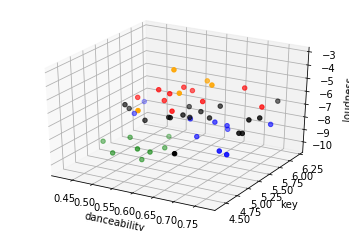

In [29]:
import matplotlib.pyplot as plt
color_map = {
    0: 'blue',
    1: 'red',
    2: 'green',
    3: 'orange',
    4: 'black'
}
colors = sample['cluster'].map(color_map)
plot_3d('danceability', 'key', 'loudness', sample, colors)

In [30]:
sample

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
genre,,,,,,,,,,,,,,
pop,6gS3HhOiI17QNojjPuPzqc,0.646260,0.622910,5.36,-5.79909,0.66,0.086982,0.226059,0.002211,0.152532,0.501731,115.68359,3.96,1
poprap,5SrYLEPXnsfmK4ZuOCIKKm,0.756290,0.607630,5.37,-6.57060,0.54,0.187661,0.161173,0.001188,0.165433,0.469726,124.51938,4.00,4
hiphop,6MXkE0uYF4XwU4VTtyrpfP,0.763650,0.684380,5.82,-7.78006,0.42,0.245931,0.132631,0.002554,0.198494,0.669080,102.13952,4.01,0
rap,6s5MoZzR70Qef7x4bVxDO1,0.771600,0.622500,5.47,-6.53399,0.58,0.192807,0.142510,0.001689,0.163494,0.486566,125.69018,4.01,4
electropop,1BYospE2cLB28m3i84dcTV,0.660160,0.627720,5.63,-6.59785,0.56,0.070607,0.222024,0.037668,0.152950,0.490414,120.33208,4.04,4
modernrock,5HufsVvMDoIPr9tGzoJpW0,0.549410,0.777360,5.27,-5.28489,0.72,0.056648,0.067450,0.035907,0.192436,0.515872,127.36325,3.95,1
alternativerb,0Hwb2a9DJdom4yoe5V41K9,0.641570,0.493010,5.28,-8.37473,0.48,0.118080,0.354245,0.023717,0.144984,0.429175,110.14421,3.93,0
southernhiphop,18jT9NMRZifv6cMtK2jWD4,0.759840,0.671800,5.63,-6.08313,0.56,0.194384,0.088992,0.000287,0.180445,0.541636,125.17563,3.98,1
undergroundhiphop,6d99h91us5ozdlNDvaeyXn,0.731650,0.585400,4.95,-8.23433,0.65,0.191798,0.193008,0.015954,0.211579,0.358806,122.13599,3.94,0


In [32]:
sample[sample['cluster']==0] 

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
genre,,,,,,,,,,,,,,
hiphop,6MXkE0uYF4XwU4VTtyrpfP,0.763650,0.68438,5.82,-7.78006,0.42,0.245931,0.132631,0.002554,0.198494,0.669080,102.13952,4.01,0
alternativerb,0Hwb2a9DJdom4yoe5V41K9,0.641570,0.49301,5.28,-8.37473,0.48,0.118080,0.354245,0.023717,0.144984,0.429175,110.14421,3.93,0
undergroundhiphop,6d99h91us5ozdlNDvaeyXn,0.731650,0.58540,4.95,-8.23433,0.65,0.191798,0.193008,0.015954,0.211579,0.358806,122.13599,3.94,0
indierb,2xblssDewgd1AA5R7Lap6w,0.663940,0.45932,5.78,-8.68809,0.41,0.110102,0.357165,0.023575,0.135249,0.438332,108.27650,3.92,0
deeppoprb,2BvxkVFgxGelSCrWV53I2o,0.662680,0.54211,5.49,-7.54225,0.40,0.125165,0.243836,0.000324,0.165555,0.435744,112.46318,3.98,0
country,4mijVkpSXJziPiOrK7YX4M,0.603600,0.64342,5.48,-7.62414,0.95,0.041830,0.241450,0.000201,0.156768,0.586830,124.62881,3.96,0
vaportrap,7o7kEPpjIe3yRRPbDFJSIR,0.754580,0.55823,4.90,-8.26318,0.54,0.212926,0.161462,0.001800,0.165777,0.397804,131.59941,4.00,0
anthemworship,0pcdBX3CHzyOFHeyu7RAQI,0.434310,0.53201,5.94,-8.14746,0.91,0.041484,0.292087,0.007803,0.196804,0.246033,121.24818,3.87,0
indiegaragerock,7lCazMg1AalQrclLnSpn7v,0.472069,0.67374,5.40,-7.81859,0.73,0.045371,0.206798,0.272593,0.198332,0.479604,125.58066,3.97,0


In [33]:
sample[sample['cluster']==1] 

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
genre,,,,,,,,,,,,,,
pop,6gS3HhOiI17QNojjPuPzqc,0.64626,0.62291,5.36,-5.79909,0.66,0.086982,0.226059,0.002211,0.152532,0.501731,115.68359,3.96,1
modernrock,5HufsVvMDoIPr9tGzoJpW0,0.54941,0.77736,5.27,-5.28489,0.72,0.056648,0.067450,0.035907,0.192436,0.515872,127.36325,3.95,1
southernhiphop,18jT9NMRZifv6cMtK2jWD4,0.75984,0.67180,5.63,-6.08313,0.56,0.194384,0.088992,0.000287,0.180445,0.541636,125.17563,3.98,1
dancepop,2ZIRxkFuqNPMnlY7vL54uK,0.69424,0.73412,5.86,-5.45434,0.56,0.074673,0.113860,0.013701,0.165191,0.584726,119.01202,3.97,1
contemporarycountry,0VZfpqcbBUWC6kpP1vVrvA,0.57639,0.71481,5.27,-5.43278,0.90,0.045489,0.191860,0.000484,0.152309,0.563090,126.81991,3.97,1
countryroad,4fj8PNbbwGXBWHKodGQhfD,0.58290,0.70674,5.71,-5.99508,0.94,0.043092,0.211440,0.000269,0.178728,0.577140,129.27751,3.94,1
christianalternativerock,3P1RRrVtaVLBTOvvNm8k8N,0.49224,0.66003,5.31,-6.26933,0.83,0.043398,0.179827,0.005684,0.170913,0.391737,123.40257,3.94,1
moderncountryrock,01b3JSy4UfA2iiKodhAXse,0.57386,0.70960,5.60,-5.57883,0.88,0.045150,0.175597,0.000276,0.176400,0.557520,133.36642,3.93,1
countrypop,1kmPba3K0wZwyVJXktgJii,0.56290,0.66143,5.27,-6.03082,0.87,0.043739,0.239203,0.000418,0.149741,0.481332,125.18072,3.97,1


In [34]:
sample[sample['cluster']==2] 

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
genre,,,,,,,,,,,,,,
folkpop,1RWc3d424qgjr8HTwCVh6A,0.554080,0.421952,5.35,-9.95709,0.85,0.038942,0.572482,0.053243,0.146550,0.394269,116.21660,3.88,2
indiecoustica,4RCjZQTtM2pXauBjFNRcGQ,0.559640,0.451426,4.98,-9.46797,0.92,0.040760,0.503060,0.012516,0.142478,0.351032,117.32339,3.96,2
christianuplift,1MfuuCRndwqJIGz1yW8aHH,0.482680,0.486524,5.21,-9.26604,0.88,0.035364,0.389759,0.049490,0.157419,0.247431,121.57188,3.89,2
indiefolk,5Z5KHMrb3bNWGOZJ6y8gsL,0.534020,0.431291,5.02,-10.32436,0.85,0.037878,0.630898,0.084814,0.144655,0.392510,111.95566,3.92,2
stompandholler,3zVZ3GsfiYp0vlVazHcDXI,0.544970,0.516279,4.84,-9.01849,0.87,0.039390,0.459705,0.116787,0.144037,0.441863,115.81394,3.94,2
rootsworship,7iGdViGFlFJhmtjga5qhMx,0.479610,0.406530,4.86,-9.79409,0.89,0.041491,0.516742,0.005380,0.170358,0.318027,116.48006,3.70,2
chamberpop,1UqeJ3nLHNDOlA6zwFkimJ,0.526050,0.492893,5.69,-9.92504,0.73,0.041229,0.495957,0.146008,0.136113,0.418207,115.75187,3.93,2
deepccm,327irrZplP8A15mvzhraRl,0.422335,0.449633,5.13,-9.78468,0.89,0.041421,0.460327,0.081514,0.172446,0.215899,119.84426,3.81,2


In [35]:
sample[sample['cluster']==3] 

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
genre,,,,,,,,,,,,,,
edm,3pDxuMpz94eDs7WFqudTbZ,0.63440,0.82290,4.96,-4.47762,0.45,0.072478,0.061799,0.148906,0.200975,0.407467,125.83852,3.96,3
electrohouse,4luNnGhISZdURbFcCl2dB6,0.67859,0.85152,5.26,-4.19084,0.58,0.092020,0.043978,0.222365,0.230274,0.385092,128.11927,4.00,3
popedm,5OFsiAHgwlYHB6XLK0kJ4p,0.58980,0.74095,4.49,-5.10419,0.53,0.065612,0.143328,0.018415,0.201176,0.362658,124.17652,4.01,3
brostep,6dvgLyeXG3HLGqtMa8wAX0,0.60483,0.88351,5.11,-3.19751,0.57,0.142058,0.035335,0.134535,0.268069,0.339570,129.09355,3.98,3
electronictrap,2UZjomZ9r1O9gWyT3BLOZC,0.62770,0.79381,5.63,-4.85216,0.52,0.125423,0.066618,0.171124,0.223206,0.337975,131.80182,3.99,3


In [36]:
sample[sample['cluster']==4] 

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
genre,,,,,,,,,,,,,,
poprap,5SrYLEPXnsfmK4ZuOCIKKm,0.75629,0.607630,5.37,-6.57060,0.54,0.187661,0.161173,0.001188,0.165433,0.469726,124.51938,4.00,4
rap,6s5MoZzR70Qef7x4bVxDO1,0.77160,0.622500,5.47,-6.53399,0.58,0.192807,0.142510,0.001689,0.163494,0.486566,125.69018,4.01,4
electropop,1BYospE2cLB28m3i84dcTV,0.66016,0.627720,5.63,-6.59785,0.56,0.070607,0.222024,0.037668,0.152950,0.490414,120.33208,4.04,4
indiepoptimism,7nHgmv7uyIA1KHj6qTttjH,0.61642,0.645740,5.20,-6.68864,0.70,0.061888,0.199000,0.017869,0.170117,0.453478,119.35208,4.01,4
indiepop,1aYiM4zLmBuFq0Fg6NQb6a,0.60347,0.681580,5.04,-6.64966,0.75,0.042584,0.165851,0.038848,0.165103,0.536920,119.13369,3.95,4
puertoricanpop,0KPfijR82jvlPTnt3Hmu2Q,0.58398,0.600460,5.63,-7.07889,0.80,0.051092,0.398153,0.000741,0.159633,0.501340,120.14343,3.85,4
latinpop,5tRvNV4dHaAbqPORml4YFS,0.63148,0.638550,5.46,-6.85393,0.81,0.052735,0.312927,0.006978,0.170886,0.528780,124.13120,3.96,4
mexicanpop,4sghNjSZeUx5DFTADuPhPj,0.66121,0.623050,5.38,-7.00880,0.81,0.060886,0.314566,0.003977,0.168342,0.537490,125.02220,3.99,4
christianpop,4LR7zJ6HkhAJFhQm4eTfqS,0.57694,0.617250,5.24,-7.17907,0.67,0.068306,0.246876,0.003915,0.158393,0.448404,120.79733,3.96,4
